# Imports

In [2]:
import torch
import numpy as np
import pandas as pd
import sklearn as skl
import torchmetrics
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torch import nn
import matplotlib.pyplot as plt
import seaborn as sns 
print(f'Pytorch Version: {torch.__version__}\n torchvision Version: {torchvision.__version__}')

Pytorch Version: 1.12.0
 torchvision Version: 0.13.0


In [3]:
device='cuda'if torch.cuda.is_available() else 'cpu'

In [4]:
device

'cpu'

In [ ]:
train_data=datasets.MNIST(root='../data',
train=True,
download=True,
transform=torchvision.transforms.ToTensor())

In [6]:
test_data=datasets.MNIST(root="../data",
train=False,
download=True,
transform=torchvision.transforms.ToTensor(),)

In [7]:
print(f'Training samples: {len(train_data)}\nTesting Samples: {len(test_data)}')

Training samples: 60000
Testing Samples: 10000


In [8]:
image,label=train_data[0]
image.shape,label

(torch.Size([1, 28, 28]), 5)

In [9]:
train_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [10]:
torch.randint(0,len(train_data),size=[1]).item()

35226

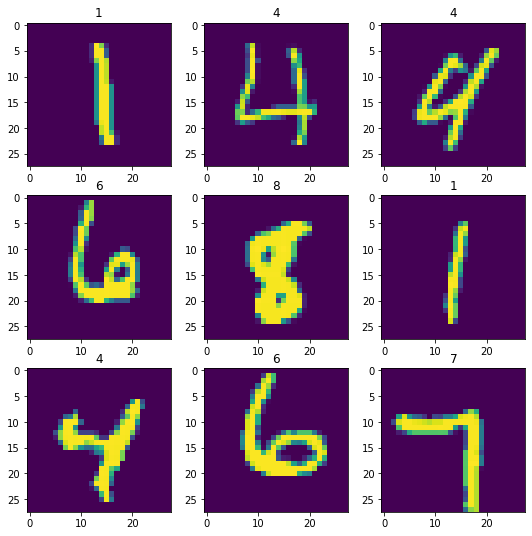

In [11]:
fig=plt.figure(figsize=(9,9))
for i in range(1,10):
    idx=torch.randint(0,len(train_data),size=[1]).item()
    image,label=train_data[idx]
    fig.add_subplot(3,3,i)
    plt.imshow(image.squeeze())
    plt.title(label=label)

# Hyper-parameters

In [12]:
BATCH_SIZE=32
EPOCHS=100
LEARNING_RATE=0.001

In [13]:
train_dl=DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

In [14]:
test_dl=DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)
print(f'No. of train batches: {len(train_dl)}\nNo.of test batches: {len(test_dl)}')

No. of train batches: 1875
No.of test batches: 313


In [15]:

class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.lgr=nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28,10)
        )
    def forward(self,x):
        return self.lgr(x)


In [16]:
lgr=LogisticRegression()
loss_fn=nn.CrossEntropyLoss()
accuracy=torchmetrics.Accuracy()
optimizer=torch.optim.SGD(lgr.parameters(),lr=LEARNING_RATE)
print(lgr)

LogisticRegression(
  (lgr): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
  )
)


In [17]:
def train_loop(
    model:torch.nn.Module,
    data_loader:torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    device: torch.device=device):
    
    for epoch in range(EPOCHS):

        train_loss=0
        train_acc=0
        for x,y in data_loader:
            lgr.train()
            y_pred=model(x)
            loss=loss_fn(y_pred,y)
            train_loss+=loss
            train_acc+=accuracy(y_pred,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f'Epoch: {epoch+1}| Train Loss: {train_loss/len(train_dl)}| Train acc: {train_acc/len(train_dl)}')
            

    


In [18]:
train_loop(lgr,train_dl,loss_fn,optimizer)

Epoch: 1| Train Loss: 1.6643491983413696| Train acc: 0.6665499806404114
Epoch: 2| Train Loss: 1.0478843450546265| Train acc: 0.8134666681289673
Epoch: 3| Train Loss: 0.8295053243637085| Train acc: 0.8360000252723694
Epoch: 4| Train Loss: 0.7193810343742371| Train acc: 0.8476666808128357
Epoch: 5| Train Loss: 0.6519660353660583| Train acc: 0.8558833599090576
Epoch: 6| Train Loss: 0.6058158278465271| Train acc: 0.8611999750137329
Epoch: 7| Train Loss: 0.5719086527824402| Train acc: 0.8654333353042603
Epoch: 8| Train Loss: 0.5457786917686462| Train acc: 0.8685500025749207
Epoch: 9| Train Loss: 0.5248492956161499| Train acc: 0.8717166781425476
Epoch: 10| Train Loss: 0.5076435804367065| Train acc: 0.8741666674613953
Epoch: 11| Train Loss: 0.4932129979133606| Train acc: 0.876800000667572
Epoch: 12| Train Loss: 0.4808676838874817| Train acc: 0.8787166476249695
Epoch: 13| Train Loss: 0.4701727628707886| Train acc: 0.8801000118255615
Epoch: 14| Train Loss: 0.4607442617416382| Train acc: 0.88171

In [19]:
def evaluate(
    model: torch.nn.Module,
    DataLoader:torch.utils.data.DataLoader,
    loss_fn:torch.nn.Module,
    device:torch.device=device
):
    model.eval()
    with torch.inference_mode():
        test_acc=test_loss=0
        for x,y in DataLoader:
            y_pred=model(x)
            loss=loss_fn(y_pred,y)
            test_loss+=loss
            acc=accuracy(y_pred,y)
            test_acc+=acc
        test_loss/=len(DataLoader)
        test_acc/=len(DataLoader)
        print(f'Test Loss: {test_loss} | Test Acc: {test_acc}')

In [20]:
evaluate(lgr,test_dl,loss_fn)

Test Loss: 0.30529940128326416 | Test Acc: 0.9166333675384521


In [21]:
torch.save(lgr,'logistic_regression.pt')